In [1]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, librosa.display, urllib, IPython.display, os, soundfile as sf
plt.rcParams['figure.figsize'] = (14,4)

In [2]:
joke=r'..\V6_robot_recordings\2019-04-13 Cienna Nerdy Show at The Drake\jokes_and_pauses\joke_1.mp3'
laugh=r'..\V6_robot_recordings\2019-04-13 Cienna Nerdy Show at The Drake\jokes_and_pauses\pause_1.mp3'
test=r'.\download.wav'
shorter=r'.\shorter.wav'

path = shorter

y, sr = librosa.load(path,sr=None)
mfccs = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=24)

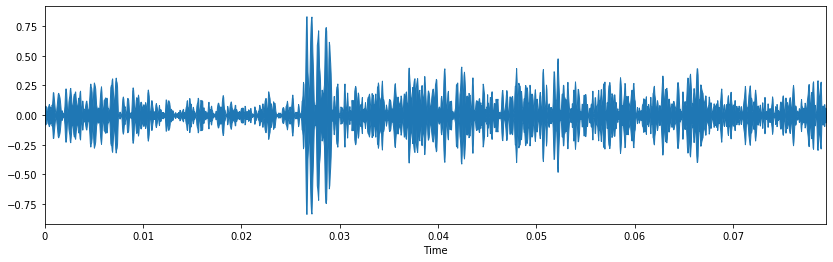

In [3]:
x, fs = librosa.load(path)
librosa.display.waveplot(x, sr=fs)

In [4]:

IPython.display.Audio(x, rate=fs)

In [5]:
# computes MFCCs
mfccs = librosa.feature.mfcc(x, sr=fs)
print (mfccs.shape) # (Number of MFCCs, Number of frames)

(20, 4)


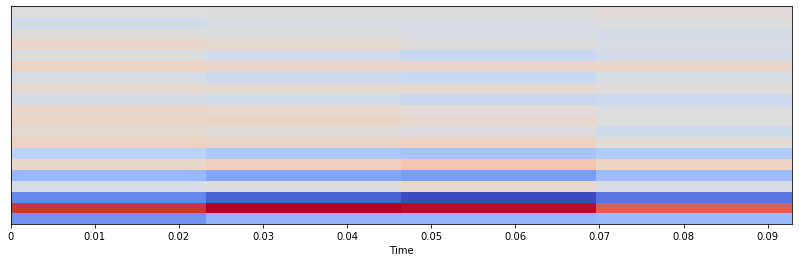

In [6]:
# Display the MFCCs
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

In [7]:
# scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print (mfccs.mean(axis=1))
print (mfccs.var(axis=1))

[-1.4901161e-08  0.0000000e+00  7.4505806e-09  0.0000000e+00
  0.0000000e+00  1.4901161e-08  1.8626451e-08  0.0000000e+00
  5.9604645e-08  0.0000000e+00  0.0000000e+00  7.4505806e-09
  0.0000000e+00  0.0000000e+00  1.4901161e-08 -2.7939677e-09
  0.0000000e+00  0.0000000e+00 -1.4901161e-08  0.0000000e+00]
[0.99999994 1.0000001  1.         0.99999994 1.         1.
 1.0000001  1.         0.99999994 1.         0.99999994 1.
 0.9999999  1.0000001  0.99999994 0.99999994 1.         0.9999999
 1.         0.9999999 ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


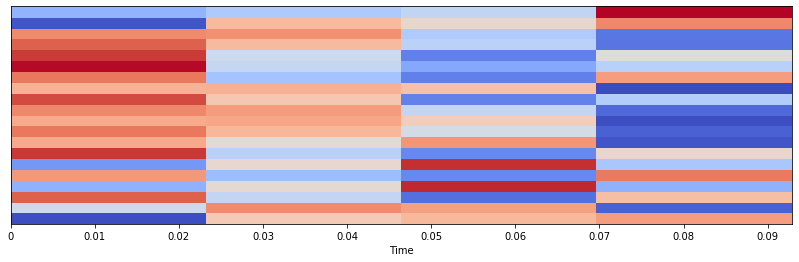

In [8]:
# Display the scaled MFCCs
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

In [9]:
sf.write('test.wav', mfccs, 44100)